In [1]:
%matplotlib notebook

In [2]:
import pandas as pd #数据分析
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
0.1%100

0.1

In [4]:
def setBarLabels(axe): 
    from matplotlib.pyplot import Rectangle
    ylim1,ylim2=bars.get_ylim()
    lim=(ylim2-ylim1)%5
    for rect in axe.get_children():
        #print(rect)
        if type(rect)==Rectangle:
            height = rect.get_height()
            #print(height)
            plt.text(rect.get_x(),height+lim , '%.2f' % float(height)) 
            #plt.text(rect.get_x(),1.02*height , '%.3f' % float(height))
def setBarhLabels(axe): 
    from matplotlib.pyplot import Rectangle
    xlim1,xlim2=bars.get_xlim()
    lim=(xlim2-xlim1)/100
    for rect in axe.get_children():
        if type(rect)==Rectangle:
            #zeroX = rect.get_zorder.get_x
            width = rect.get_width()
            plt.text(width+lim,rect.get_y(),'%.3f' % float(width))
            #plt.text(rect.get_x()+lim,rect.get_y(),'%.3f' % float(width))

In [24]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")
data_full = pd.concat([data_train,data_test])
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_full.iloc[890:,:].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154


<IPython.core.display.Javascript object>


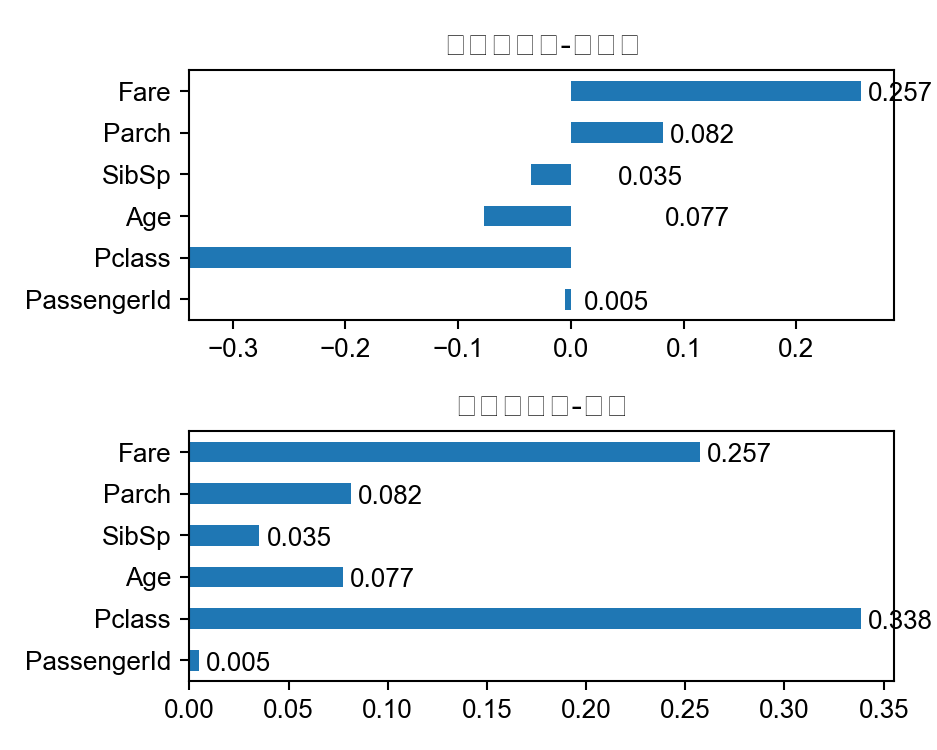

In [9]:
#各特征之间的关系
plt.figure(figsize=(5,4))
ax1=plt.subplot(2,1,1)
bars=data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0).plot.barh(ax=ax1)
setBarhLabels(bars)
plt.title("特征影响力-相关性")
ax2=plt.subplot(2,1,2)
bars=abs(data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0)).plot.barh(ax=ax2)
setBarhLabels(bars)
plt.title("特征影响力-对比")
plt.tight_layout()


<IPython.core.display.Javascript object>


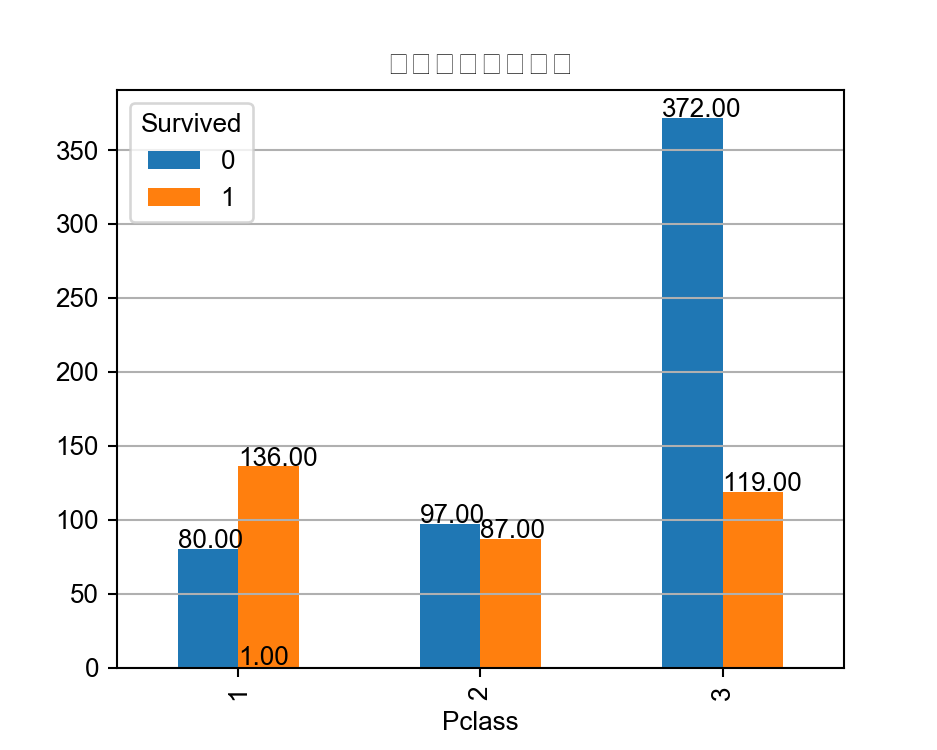

In [10]:
plt.figure(figsize=(5,4))
ax1=plt.subplot(1,1,1)
bars=data_train.groupby(by=['Pclass']).Survived.value_counts().unstack().plot.bar(ax=ax1);
setBarLabels(bars)
plt.grid(axis='y')
plt.title('船舱等级生还对比');

可以看出:  
Pclass=1 的生还人数比未生还人数多  
Pclass=2 的生还人数比未生还人数基本持平  
Pclass=3 的未生还人数远远高出生还人数  

In [11]:
def plot_distribution( df , var , target , **kwargs ):
    import seaborn as sns
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

<IPython.core.display.Javascript object>


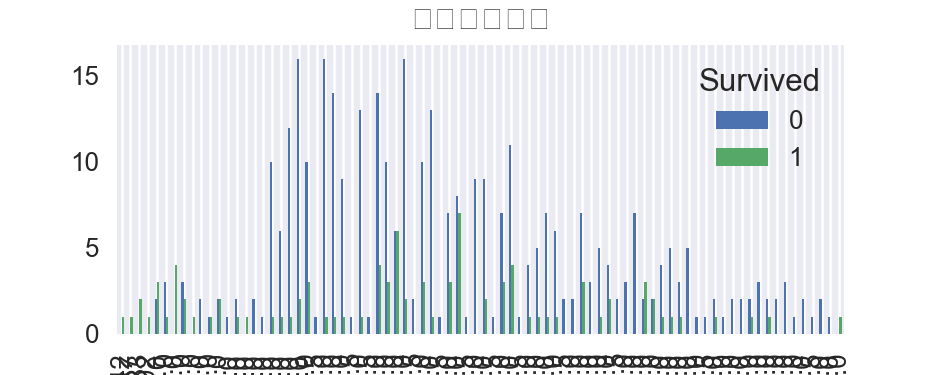

<IPython.core.display.Javascript object>


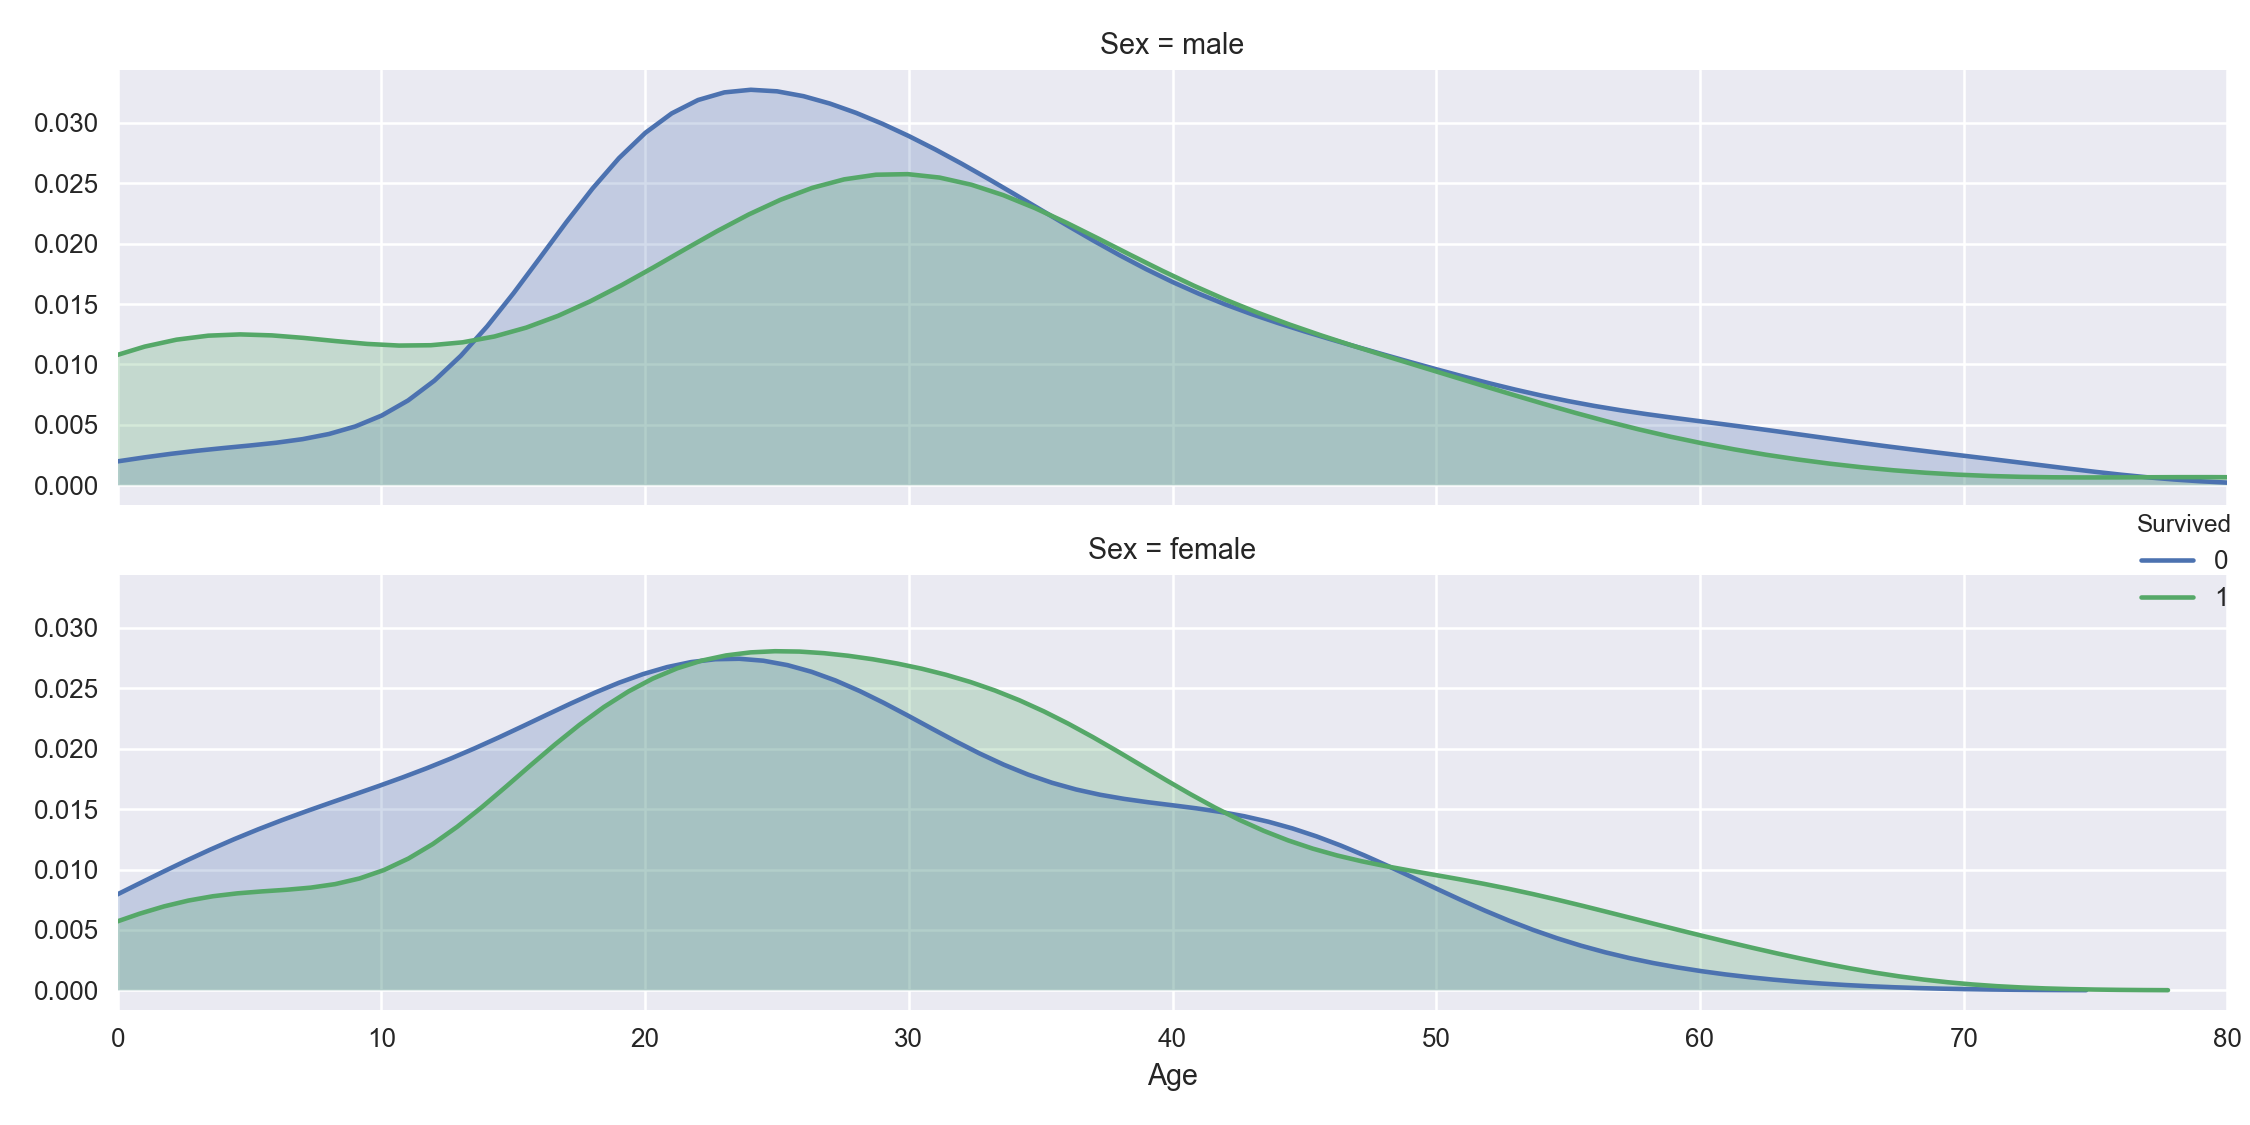

In [18]:
plt.figure(figsize=(5,2))
ax1=plt.subplot(1,1,1)
bars=data_train[data_train.Sex=='male'].groupby(by=['Age']).Survived.value_counts().unstack().plot.bar(ax=ax1);
plt.grid(axis='y')
plt.title('年龄生还对比');
plot_distribution(data_train, var = 'Age' , target = 'Survived' , row = 'Sex')

In [31]:
data_full.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


# 提取特征

In [54]:
import re
#人名中带有称呼，可以提取出来
#data_full.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())
data_train['Title']=data_train.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())
data_test['Title']=data_train.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())

In [103]:
#传票里貌似也有类别信息
data_train['Ticket_Title']=data_train.Ticket.apply(lambda x: ''.join(re.split(' ',x)[0:len(re.split(' ',x))-1]).strip())
data_test['Ticket_Title']=data_test.Ticket.apply(lambda x: ''.join(re.split(' ',x)[0:len(re.split(' ',x))-1]).strip())

# 数据预处理

In [105]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,


## 1.缺失数据补齐

训练集数据：  
记录总数 : 891  
Age : 714  
Cabin : 204 缺失很多  
Embarked : 889 只确实2条  

测试集数据：  
记录总数 : 418  
Age : 332  
Cabin : 91 缺失很多

In [106]:
data_full = pd.concat([data_train,data_test])
data_full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_Title,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,A/5,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,PC,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,STON/O2.,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,,Mr


In [25]:
#年龄使用全船人员平均年龄补充
data_train.Age.fillna(data_full.Age.mean(),inplace=True)
data_train.Embarked.fillna('X',inplace=True)

#顺便将测试数据也补齐
data_test.Age.fillna(data_full.Age.mean(),inplace=True)
data_test.Embarked.fillna('X',inplace=True)

#Cabin 类型暂不处理

In [26]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.735277,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002218,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
data_full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_Title,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,A/5,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,PC,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,STON/O2.,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,,Mr


## 2.数据标准化

In [113]:
from sklearn import preprocessing
#Sex、Embarked、Ticket字段都是
le_Title = preprocessing.LabelEncoder()
le_Ticket_Title = preprocessing.LabelEncoder()
le_Sex = preprocessing.LabelEncoder()
le_Embarked = preprocessing.LabelEncoder()
le_Title.fit(data_full.Title)
le_Ticket_Title.fit(data_full.Ticket_Title)
le_Sex.fit(data_full.Sex)
le_Embarked.fit(data_full.Embarked)

LabelEncoder()

In [115]:
data_train['STitle']=le_Title.transform(data_train.Title)
data_train['STicket_Title']=le_Ticket_Title.transform(data_train.Ticket_Title)
data_train['SSex']=le_Sex.transform(data_train.Sex)
data_train['SEmbarked']=le_Embarked.transform(data_train.Embarked)

data_test['STitle']=le_Title.transform(data_test.Title)
data_test['STicket_Title']=le_Ticket_Title.transform(data_test.Ticket_Title)
data_test['SSex']=le_Sex.transform(data_test.Sex)
data_test['SEmbarked']=le_Embarked.transform(data_test.Embarked)

In [118]:
print(data_train.columns)
data_train.head(1)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Ticket_Title',
       'STitle', 'STicket_Title', 'SSex', 'SEmbarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title,STitle,STicket_Title,SSex,SEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,A/5,11,6,1,2


In [119]:
#Cabin略去
X_Columns=['Pclass','Age','SibSp','Parch','Fare','STitle', 'STicket_Title', 'SSex', 'SEmbarked']
data_train_X=data_train[X_Columns]
data_train_y=data_train['Survived']

In [120]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Modelling Algorithms
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,GradientBoostingRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV

c:\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<IPython.core.display.Javascript object>


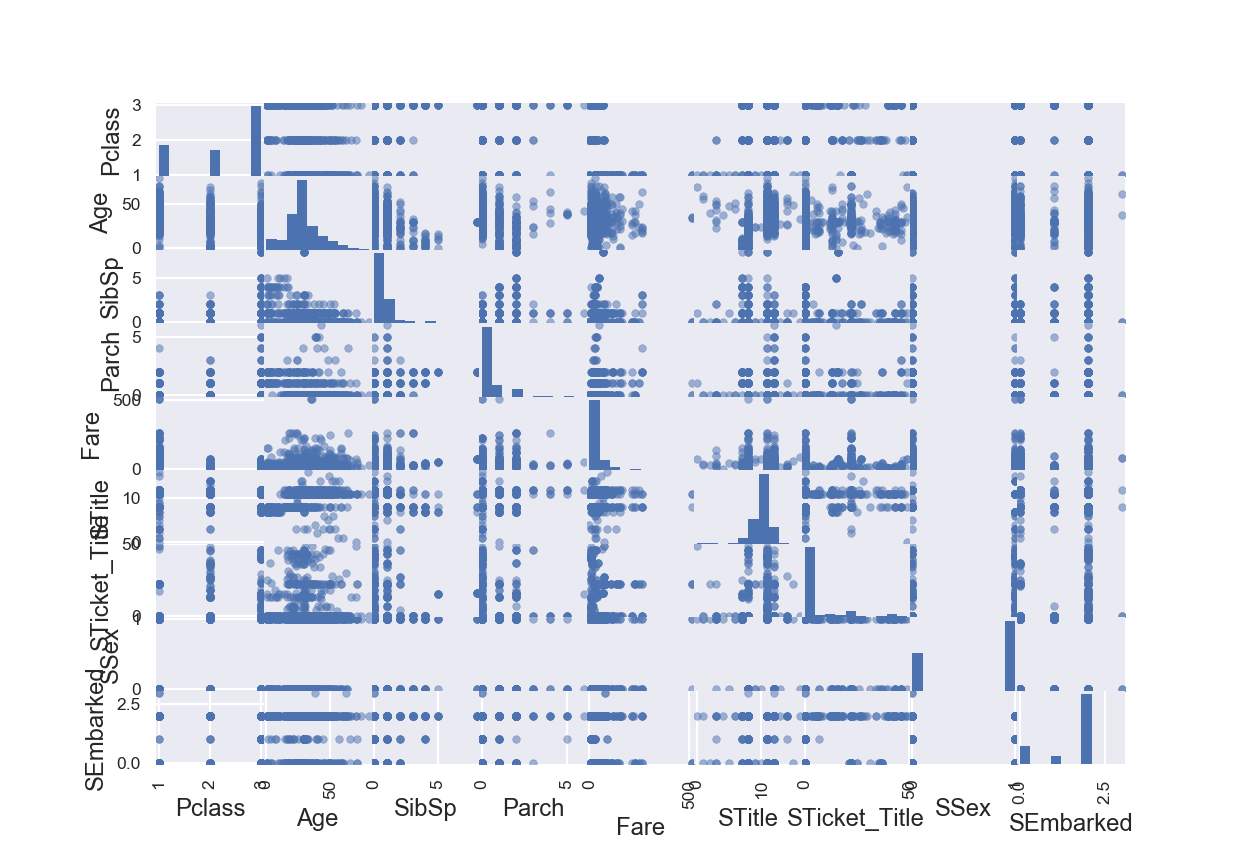

In [122]:
scatter_matrix(data_train_X);

In [123]:
validation_size = 0.40
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data_train_X, data_train_y, test_size=validation_size, random_state=seed)

In [130]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegressionCV()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, data_train_X, data_train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.793546 (0.031402)
LDA: 0.790150 (0.032385)
KNN: 0.718340 (0.026703)
CART: 0.766592 (0.036574)
NB: 0.781149 (0.021996)
SVM: 0.667790 (0.048748)
RFC: 0.811448 (0.042274)


<IPython.core.display.Javascript object>


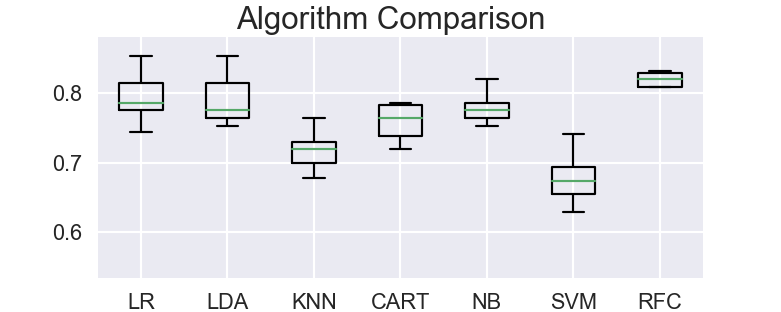

In [131]:
# Compare Algorithms
fig = plt.figure(figsize=(5,2))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()